1. What is the average number of riders health insurance customers purchase,
and which ones are the most popular? 

Ans: Most people will purchase Rider 3 and 4 together, with the highest frequency of 474. The average number of riders customers are purchasing are 2 health insurances.

2. What is the most popular rider for older people? 

Ans: Amongst the older people, Rider 4 is the most popular.

3. Which model did you use to gain insight into the insuree behaviour, and what
are the determining factors for choosing this model?

Ans: Gradient Boosting. There are several prediction models that I have tried out, namely logistic regression, decision trees, random forest and gradient boosting. Among these few options, gradient boosting provided a better result and may improve the performance of the algorithm by reducing overfitting.

4. Why are the insurees not renewing and what are the most important factors?

Ans: Insurees are not renewing due to the factors like insuredMonths and the premiumFrequency. Based on the correlation matrix, they seem to have a higher positive correlation to the likelihood of renewal. I believe due to these two factors, it may have result in a higher premium paid and that affects their decision as well.

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score,roc_curve,auc,recall_score,f1_score,precision_score,classification_report,confusion_matrix,auc

# Data Pre-processing Steps

In [2]:
insurance_claims = pd.read_csv('insurance_data.csv', sep=';')

In [3]:
insurance_claims.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y


In [4]:
insurance_claims.shape

(5500, 15)

In [5]:
insurance_claims.describe()

,insuree#,is45OrOlder,insuredMonths,premiumFrequency
count,5500.000000,5404.000000,5500.000000,5386.000000
mean,2750.500000,0.162657,34.678909,4.086892
std,1587.857571,0.369087,42.225326,4.548742
min,1.000000,0.000000,0.000000,1.000000
25%,1375.750000,0.000000,9.000000,1.000000
50%,2750.500000,0.000000,29.000000,1.000000
75%,4125.250000,0.000000,56.000000,3.000000
max,5500.000000,1.000000,720.000000,12.000000


In [6]:
insurance_claims.skew().sort_values()

<ipython-input-6-6410dd46a416>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insurance_claims.skew().sort_values()


insuree#            0.000000
premiumFrequency    1.104605
is45OrOlder         1.828662
insuredMonths       8.612597
dtype: float64

In [7]:
#finding the types
insurance_claims.dtypes

insuree#                      int64
gender                       object
is45OrOlder                 float64
isMarried                    object
hasKids                      object
insuredMonths                 int64
termLifeInsurance            object
multipleTermLifePolicies     object
healthInsurance              object
healthRiders                 object
premiumFrequency            float64
eStatements                  object
monthlyPremium               object
totalPremium                 object
renewal                      object
dtype: object

In [8]:
insurance_claims.convert_dtypes()
insurance_claims.dtypes

insuree#                      int64
gender                       object
is45OrOlder                 float64
isMarried                    object
hasKids                      object
insuredMonths                 int64
termLifeInsurance            object
multipleTermLifePolicies     object
healthInsurance              object
healthRiders                 object
premiumFrequency            float64
eStatements                  object
monthlyPremium               object
totalPremium                 object
renewal                      object
dtype: object

In [9]:
insurance_claims

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,5496,F,0.0,Yes,Yes,4,Yes,Yes,Class A,4,1.0,Yes,"85,95","381,3",N
5496,5497,M,0.0,Yes,No,3,Yes,No,No,NaN,1.0,No,20,"49,65",Y
5497,5498,M,0.0,Yes,No,56,Yes,No,Class A,4,3.0,Yes,"80,9","4557,5",Y
5498,5499,M,0.0,Yes,Yes,54,Yes,No,No,NaN,12.0,No,"20,4","1090,6",Y


# Question 1: What is the average number of riders health insurance customers purchase, and which ones are the most popular?

In [10]:
#to identify most popular one
df_rider = insurance_claims
df_rider['healthRiders'].describe()

count     3518
unique      15
top        3,4
freq       474
Name: healthRiders, dtype: object

In [11]:
df_rider[['1stR', '2ndR', '3rdR','4thR']] = df_rider['healthRiders'].str.split(',', expand=True)

In [12]:
df_rider[['1stR', '2ndR', '3rdR','4thR']].apply(pd.Series.value_counts)

,1stR,2ndR,3rdR,4thR
1,1564,NaN,NaN,NaN
2,1010,878.0,NaN,NaN
3,712,887.0,500.0,NaN
4,232,702.0,793.0,374.0


# Question 2: What is the most popular rider for older people?

In [13]:
#form a new dataset with older people
df_old = insurance_claims.loc[insurance_claims['is45OrOlder'] == 1.0]
df_old

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,1stR,2ndR,3rdR,4thR
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N,3,None,None,None
5,6,M,1.0,No,No,3,Yes,Yes,Class A,2,1.0,Yes,"81,35","233,7",N,2,None,None,None
9,10,F,1.0,No,No,31,Yes,Yes,Class A,"2,3,4",1.0,Yes,"99,95","3186,65",N,2,3,4,None
12,13,F,1.0,No,No,6,Yes,Yes,Class A,"2,3,4",1.0,Yes,"98,25","560,6",N,2,3,4,None
20,21,F,1.0,No,No,4,Yes,Yes,Class A,NaN,NaN,Yes,"74,45","294,45",Y,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,5450,F,1.0,Yes,No,19,Yes,Yes,Class A,"3,4",NaN,Yes,"94,95","1760,25",Y,3,4,None,None
5456,5457,F,1.0,Yes,No,17,Yes,Yes,Class A,1,1.0,Yes,"85,35","1463,45",N,1,None,None,None
5458,5459,M,1.0,Yes,No,72,Yes,Yes,Class B,"3,4",12.0,Yes,"73,45",5329,Y,3,4,None,None
5463,5464,F,1.0,Yes,No,70,Yes,Yes,Class A,"1,2,3,4",12.0,Yes,113,"7987,6",Y,1,2,3,4


In [14]:
#split by delimiter
df_old[['has1', 'has2', 'has3','has4']] = df_old['healthRiders'].str.split(',', expand=True)
df_old[['has1', 'has2', 'has3', 'has4']].apply(pd.Series.value_counts)

/Users/geraldine/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,has1,has2,has3,has4
1,218,NaN,NaN,NaN
2,230,133.0,NaN,NaN
3,176,180.0,73.0,NaN
4,52,175.0,154.0,56.0


# Question 3: Which model did you use to gain insight into the insuree behaviour, and what are the determining factors for choosing this model?

In [15]:
# insurance_claims.dtypes
# obj_list = list(obj_df.columns)
# print(obj_list)

In [16]:
insurance_claims['isRenewed'] = [ 1 if x =='Y' else 0 for x in insurance_claims['renewal'] ]
insurance_claims.head()
insurance_claims.drop(columns = ['renewal'],inplace=True)

In [17]:
insurance_claims['isFemale'] = [ 1 if x =='F' else 0 for x in insurance_claims['gender'] ]
insurance_claims.head()
insurance_claims.drop(columns = ['gender'],inplace=True)

In [18]:
insurance_claims['isMarried'] = [ 1 if x =='Yes' else 0 for x in insurance_claims['isMarried'] ]
insurance_claims.head()
insurance_claims.drop(columns = ['isMarried'],inplace=True)

In [19]:
insurance_claims['hasKids'] = [ 1 if x =='Yes' else 0 for x in insurance_claims['hasKids'] ]
insurance_claims.head()
insurance_claims.drop(columns = ['hasKids'],inplace=True)

In [20]:
insurance_claims['hasTermLifeInsurance'] = [ 1 if x =='Yes' else 0 for x in insurance_claims['termLifeInsurance'] ]
insurance_claims.head()
insurance_claims.drop(columns = ['termLifeInsurance'],inplace=True)

In [21]:
insurance_claims['hasMultipleTermLifePolicies'] = [ 1 if x =='Yes' else 0 for x in insurance_claims['multipleTermLifePolicies'] ]
insurance_claims.head()
insurance_claims.drop(columns = ['multipleTermLifePolicies'],inplace=True)

In [22]:
insurance_claims['hasEStatements'] = [ 1 if x =='Yes' else 0 for x in insurance_claims['eStatements'] ]
insurance_claims.head()
insurance_claims.drop(columns = ['eStatements'],inplace=True)

In [23]:
insurance_claims['hasClassA'] = [ 1 if x =='Class A' else 0 for x in insurance_claims['healthInsurance']]


In [24]:
insurance_claims['hasClassB'] = [ 1 if x =='Class B' else 0 for x in insurance_claims['healthInsurance']]

In [25]:
insurance_claims['hasNoHI'] = [ 1 if x =='Class A' else 0 for x in insurance_claims['healthInsurance']]

In [26]:
insurance_claims.drop(columns = ['healthInsurance'],inplace=True)

In [27]:
insurance_claims.drop(columns = ['healthRiders'],inplace=True)

In [28]:
insurance_claims.drop(columns = ['monthlyPremium'],inplace=True)

In [29]:
insurance_claims.drop(columns = ['totalPremium'],inplace=True)

In [30]:
#not needed 
insurance_claims.drop(columns = ['1stR', '2ndR', '3rdR', '4thR'],inplace=True)

In [31]:
#to prevent infinity and NaN error when running model
insurance_claims.dropna(inplace=True)

In [32]:
insurance_claims.head()
insurance_claims_features_list = list(insurance_claims.columns)
print(insurance_claims_features_list)

['insuree#', 'is45OrOlder', 'insuredMonths', 'premiumFrequency', 'isRenewed', 'isFemale', 'hasTermLifeInsurance', 'hasMultipleTermLifePolicies', 'hasEStatements', 'hasClassA', 'hasClassB', 'hasNoHI']


In [33]:
def eda_plots(df,features_list,plot_title,fig_size):

    df[features_list].hist(bins=40,edgecolor='b',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid= False,figsize =fig_size,color='red')

    plt.tight_layout(rect=(0,0,1.2,1.2))

    plt.suptitle(plot_title,x=0.65,y=1.25,fontsize=14)

    plt.show()

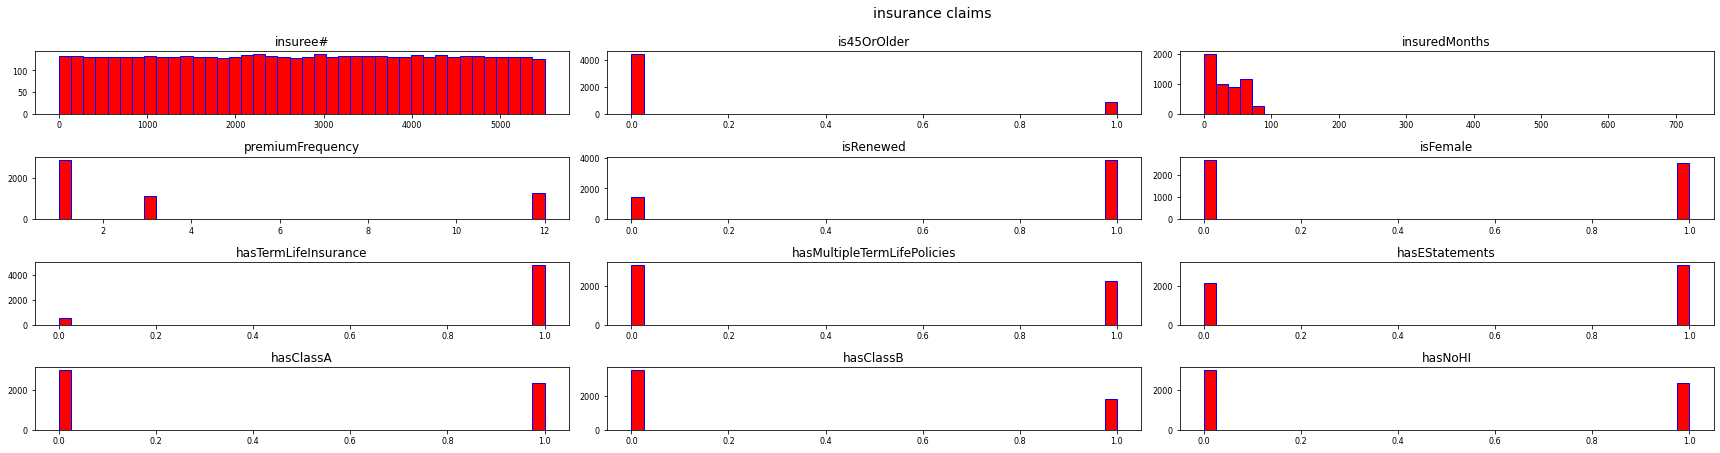

In [34]:
#data visualisation to see the spread for each factor
eda_plots(insurance_claims,insurance_claims_features_list,'insurance claims',(20,5))

In [35]:
#to check for skewness in data
insurance_claims.skew().sort_values()

hasTermLifeInsurance          -2.750738
isRenewed                     -1.045709
hasEStatements                -0.352844
insuree#                      -0.004644
isFemale                       0.053332
hasClassA                      0.237211
hasNoHI                        0.237211
hasMultipleTermLifePolicies    0.319726
hasClassB                      0.676548
premiumFrequency               1.102964
is45OrOlder                    1.820461
insuredMonths                  8.649400
dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
X = insurance_claims.drop(columns='isRenewed')
y = insurance_claims['isRenewed']
X

,insuree#,is45OrOlder,insuredMonths,premiumFrequency,isFemale,hasTermLifeInsurance,hasMultipleTermLifePolicies,hasEStatements,hasClassA,hasClassB,hasNoHI
0,1,0.0,23,12.0,1,1,0,1,0,0,0
1,2,1.0,42,1.0,1,1,1,1,1,0,1
2,3,0.0,72,12.0,1,1,0,0,0,0,0
3,4,0.0,13,12.0,1,1,0,0,0,0,0
4,5,0.0,37,1.0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5495,5496,0.0,4,1.0,1,1,1,1,1,0,1
5496,5497,0.0,3,1.0,0,1,0,0,0,0,0
5497,5498,0.0,56,3.0,0,1,0,1,1,0,1
5498,5499,0.0,54,12.0,0,1,0,0,0,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 33)
X_train

,insuree#,is45OrOlder,insuredMonths,premiumFrequency,isFemale,hasTermLifeInsurance,hasMultipleTermLifePolicies,hasEStatements,hasClassA,hasClassB,hasNoHI
2571,2572,0.0,5,1.0,0,1,0,0,0,0,0
1054,1055,1.0,43,1.0,1,0,0,0,0,1,0
2687,2688,1.0,72,12.0,1,1,1,1,1,0,1
4841,4842,0.0,60,1.0,1,1,1,1,1,0,1
5025,5026,0.0,1,1.0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.0,54,12.0,0,1,1,1,1,0,1
3402,3403,0.0,72,12.0,1,0,0,0,0,1,0
2819,2820,0.0,3,1.0,1,1,0,1,0,1,0
603,604,0.0,14,3.0,1,1,1,1,0,1,0


In [39]:
lm = LinearRegression()

In [40]:
X_test.fillna(X_train.mean(), inplace=True)

/Users/geraldine/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [41]:
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
print(round(lm.intercept_,2))

0.68


In [43]:
pd.DataFrame(lm.coef_,X.columns, columns=['Coefficients'])

,Coefficients
insuree#,-0.000002
is45OrOlder,-0.083655
insuredMonths,0.001901
premiumFrequency,0.018770
isFemale,-0.001517
hasTermLifeInsurance,0.111838
hasMultipleTermLifePolicies,-0.011335
hasEStatements,-0.067233
hasClassA,-0.126180
hasClassB,-0.050600


In [45]:
y_pred = lm.predict(X_test)

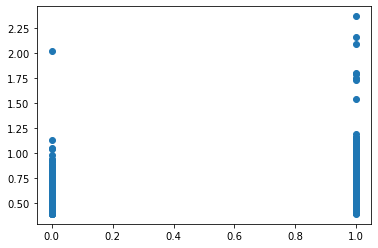

In [46]:
plt.scatter(y_test,y_pred)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)

In [48]:
r2 = r2_score(y_test, y_pred)
r2

0.18594498745758026

In [49]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
rmse

0.40153053777569614

In [50]:
X_train, X_test, y_train, y_test = train_test_split(insurance_claims, y, test_size=0.3, random_state=33) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3703, 12), (1588, 12), (3703,), (1588,))

In [51]:
models_dict = {
    'Logistic Regression':LogisticRegression(),
    'Decision Trees':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Bagging': BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1), 
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=1),
    'GradientBoost':GradientBoostingClassifier(max_depth = 2, n_estimators=100, learning_rate=1)
}

performance_data = {
    'accuracy':[],
    'precision':[],
    'recall':[],
    'f1':[]
}

In [52]:
for model_name in models_dict:
    m = models_dict[model_name] 
    m.fit(X_train,y_train)
    
    predictions = m.predict(X_test)

    acc = accuracy_score(y_test,predictions) 
    
    precision = precision_score(y_test,predictions) 

    recall = recall_score(y_test,predictions) 

    f1 = f1_score(y_test,predictions)

    performance_data['accuracy'].append(acc)
    performance_data['precision'].append(precision)
    performance_data['recall'].append(recall)
    performance_data['f1'].append(f1)

    print('f1 Score for {} is {:.5f}'.format(model_name,f1))

/Users/geraldine/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 Score for Logistic Regression is 0.99915
f1 Score for Decision Trees is 1.00000
f1 Score for Random Forest is 1.00000
f1 Score for Bagging is 0.99363
f1 Score for AdaBoost is 1.00000
f1 Score for GradientBoost is 1.00000


In [53]:
best_model = models_dict['GradientBoost']
logreg_predictions = best_model.predict(X_test)

In [54]:
print('-'*60)
print('Classification Report: \n')
print(classification_report(y_test,logreg_predictions)) 

print('-'*60)
print('Confusion Matrix: \n')

cm = confusion_matrix( y_test , logreg_predictions )
cm_df = pd.DataFrame(cm,columns=[0,1],index=[0,1])

print('Predicted')
print(cm_df,'Acutal')

------------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       419
           1       1.00      1.00      1.00      1169

    accuracy                           1.00      1588
   macro avg       1.00      1.00      1.00      1588
weighted avg       1.00      1.00      1.00      1588

------------------------------------------------------------
Confusion Matrix: 

Predicted
     0     1
0  419     0
1    0  1169 Acutal


# Question 4: Why are the insurees not renewing and what are the most important factors?

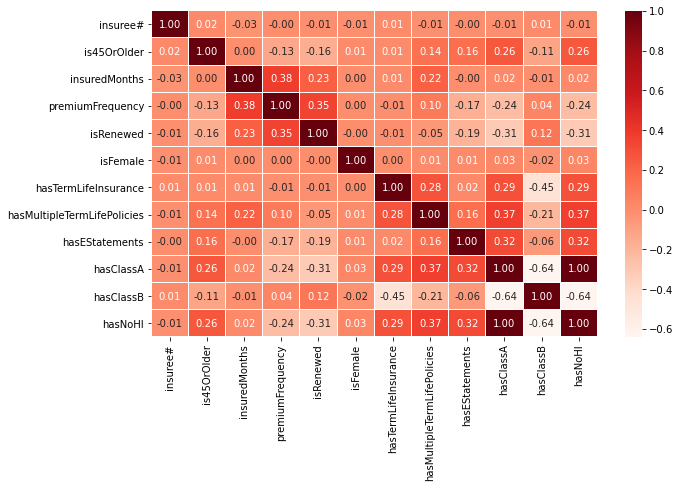

In [55]:
# finding correlation - What plot allows us to have a quick overview of the correlations?
f, ax = plt.subplots(figsize=(10, 6))

corr = insurance_claims.corr() 

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',linewidths=.05)